In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## **Importar Datos**

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/ModelosNoSupervisados2023/main/Viajes.csv")

In [3]:
df.head()

,fecha,GEO_1,GEO_2,Distancia_Km,Tiempo_A
0,2019011936260,"4.7246682,-74.0241998","4.65556449,-74.07458744",15.914,1.235278
1,2019091630910,"4.6511427,-74.1463712","4.7109886,-74.072092",14.868,0.266944
2,2019061835152,"4.71938952,-74.03346117","4.66880272,-74.07795599",9.140,0.955278
3,2019071223754,"4.75547918,-74.1156075","4.720736,-74.05435",12.270,2.268611
4,2019110920498,"4.7246682,-74.0241998","4.65556449,-74.07458744",15.914,1.325833


In [9]:
Coordenada1=df["GEO_1"].str.split(",",n=1,expand=True)
Coordenada2=df["GEO_2"].str.split(",",n=1,expand=True)

In [10]:
Coordenada1.columns=["lat1","lon1"]
Coordenada2.columns=["lat2","lon2"]

In [11]:
Coordenada1.head()

,lat1,lon1
0,4.7246682,-74.0241998
1,4.6511427,-74.1463712
2,4.71938952,-74.03346117
3,4.75547918,-74.1156075
4,4.7246682,-74.0241998


In [12]:
Coordenada2.head(2)

,lat2,lon2
0,4.65556449,-74.07458744
1,4.7109886,-74.072092


In [13]:
df=pd.concat([df[["fecha","Distancia_Km","Tiempo_A"]],Coordenada1,Coordenada2],axis=1)

In [14]:
df

,fecha,Distancia_Km,Tiempo_A,lat1,lon1,lat2,lon2
0,2019011936260,15.914,1.235278,4.7246682,-74.0241998,4.65556449,-74.07458744
1,2019091630910,14.868,0.266944,4.6511427,-74.1463712,4.7109886,-74.072092
2,2019061835152,9.140,0.955278,4.71938952,-74.03346117,4.66880272,-74.07795599
3,2019071223754,12.270,2.268611,4.75547918,-74.1156075,4.720736,-74.05435
4,2019110920498,15.914,1.325833,4.7246682,-74.0241998,4.65556449,-74.07458744
...,...,...,...,...,...,...,...
9867,2019040305577,3.037,0.969722,4.64140226,-74.06132319,4.65276758,-74.08003459
9868,2019100100284,2.553,0.774444,4.5951339,-74.1516225,4.59418907,-74.14757548
9869,2019101124249,9.508,0.444167,4.68687909,-74.06561357,4.7460123,-74.0455141
9870,2019073162603,1.686,0.568611,4.66420531,-74.0611693,4.66740682,-74.0699808


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9872 entries, 0 to 9871
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         9872 non-null   object 
 1   Distancia_Km  9872 non-null   float64
 2   Tiempo_A      9872 non-null   float64
 3   lat1          9872 non-null   object 
 4   lon1          9872 non-null   object 
 5   lat2          9872 non-null   object 
 6   lon2          9872 non-null   object 
dtypes: float64(2), object(5)
memory usage: 540.0+ KB


In [19]:
df[["lon2","lat2","lat1","lon1"]]=df[["lon2","lat2","lat1","lon1"]].astype(float) # convertir en decimales

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9872 entries, 0 to 9871
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         9872 non-null   object 
 1   Distancia_Km  9872 non-null   float64
 2   Tiempo_A      9872 non-null   float64
 3   lat1          9872 non-null   float64
 4   lon1          9872 non-null   float64
 5   lat2          9872 non-null   float64
 6   lon2          9872 non-null   float64
dtypes: float64(6), object(1)
memory usage: 540.0+ KB


# **Algoritmo Kmeans**

In [21]:
X=df[["lat1","lon1"]]

In [22]:
X

,lat1,lon1
0,4.724668,-74.024200
1,4.651143,-74.146371
2,4.719390,-74.033461
3,4.755479,-74.115607
4,4.724668,-74.024200
...,...,...
9867,4.641402,-74.061323
9868,4.595134,-74.151623
9869,4.686879,-74.065614
9870,4.664205,-74.061169


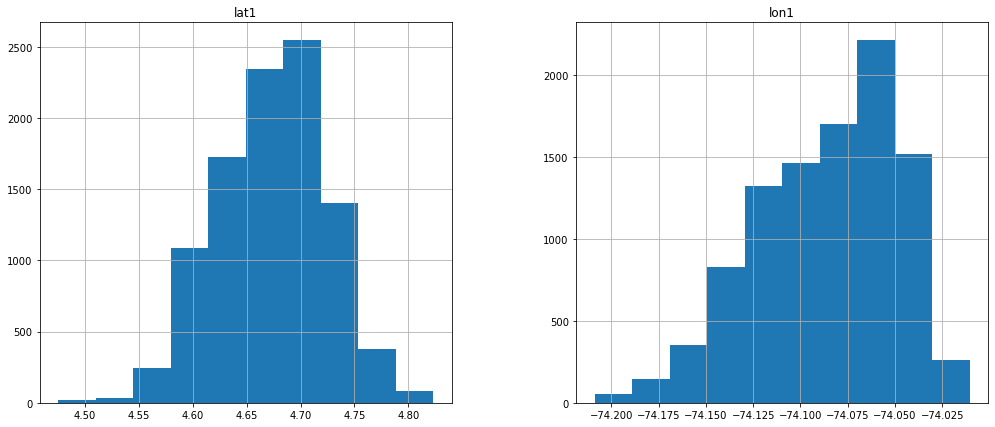

In [25]:
plt.rcParams["figure.figsize"]=(17,7)
X.hist()
plt.show()

In [32]:
## Estandarizar
X_scaled=scale(X)

In [33]:
X_scaled

array([[ 1.0243074 ,  1.66726694],
       [-0.43294424, -1.63058842],
       [ 0.91968567,  1.4172685 ],
       ...,
       [ 0.27533946,  0.54935699],
       [-0.17404753,  0.66932418],
       [-0.0331883 , -0.22373653]])

In [35]:
K=3 ## Grupos

In [37]:
kmeans=KMeans(n_clusters=K,init="k-means++",random_state=123)

In [38]:
kmeans=kmeans.fit(X_scaled)

In [39]:
kmeans.labels_

array([0, 2, 0, ..., 0, 1, 1], dtype=int32)

In [44]:
df["Cluster"]=kmeans.labels_

In [45]:
df.head()

,fecha,Distancia_Km,Tiempo_A,lat1,lon1,lat2,lon2,Cluster
0,2019011936260,15.914,1.235278,4.724668,-74.024200,4.655564,-74.074587,0
1,2019091630910,14.868,0.266944,4.651143,-74.146371,4.710989,-74.072092,2
2,2019061835152,9.140,0.955278,4.719390,-74.033461,4.668803,-74.077956,0
3,2019071223754,12.270,2.268611,4.755479,-74.115607,4.720736,-74.054350,0
4,2019110920498,15.914,1.325833,4.724668,-74.024200,4.655564,-74.074587,0


In [46]:
df.Cluster.value_counts()

1    3961
0    3563
2    2348
Name: Cluster, dtype: int64

In [47]:
df.Cluster.value_counts(normalize=True)

1    0.401236
0    0.360920
2    0.237844
Name: Cluster, dtype: float64

In [58]:
df.Cluster=df.Cluster.astype("category")

## **Visualizar los grupos**

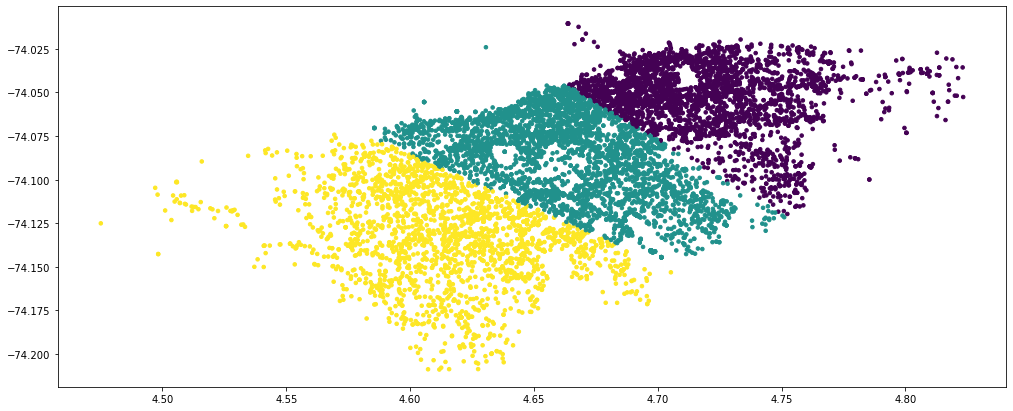

In [59]:
plt.scatter(df.lat1,df.lon1,marker=".",c=df.Cluster,s=50,cmap="viridis");

# **Mapas**

In [60]:
import plotly.express as px

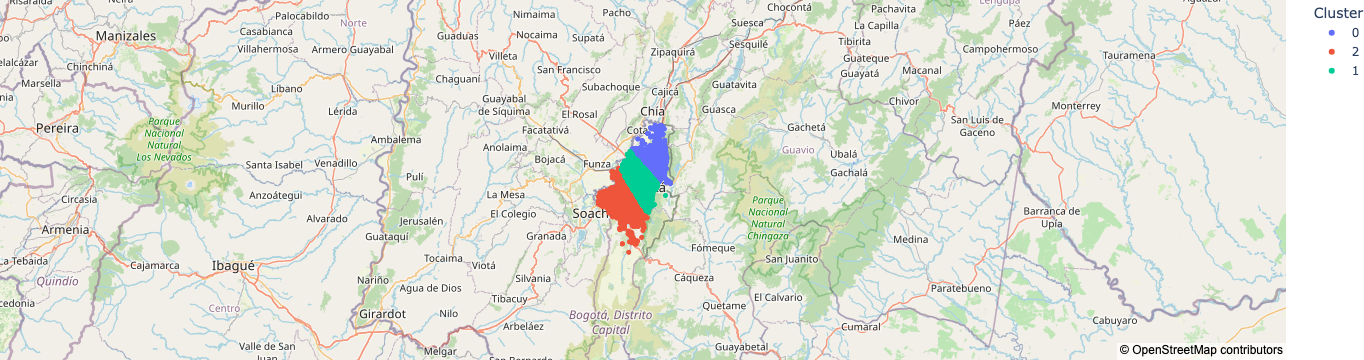

In [61]:
fig=px.scatter_mapbox(df,lat="lat1",lon="lon1",color="Cluster")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## **Modelo Supervisado**
* Hemos definido tres Zonas de mayor demanda en Bogota

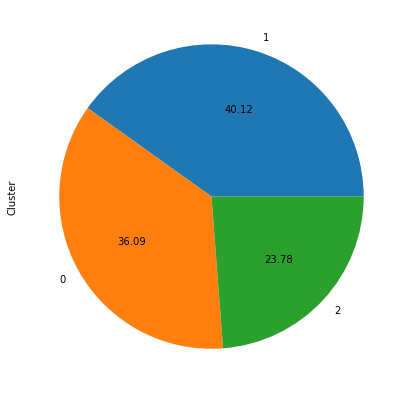

In [62]:
plot=df.Cluster.value_counts().plot(kind="pie",autopct="%.2f")

In [63]:
from sklearn.ensemble import  RandomForestClassifier

In [65]:
## Iterar pycaret y train and test split

In [66]:
X=df[["lat1","lon1"]]

In [67]:
y=df.Cluster.values

In [70]:
from sklearn.model_selection import  train_test_split

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [74]:
Modelo_RF=RandomForestClassifier(criterion="gini",n_estimators=100,
                                bootstrap=True,random_state=1234)

In [75]:
Modelo_RF=Modelo_RF.fit(x_train,y_train)

In [76]:
Modelo_RF

RandomForestClassifier(random_state=1234)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import  metrics

In [78]:
Predicciones_train_RF=Modelo_RF.predict(X=x_train)

In [79]:
Accuracy_RF_train=metrics.accuracy_score(y_train,Predicciones_train_RF)

In [80]:
print(Accuracy_RF_train)

1.0


In [81]:
Reporte_RF=metrics.classification_report(y_train,Predicciones_train_RF)
print(Reporte_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2850
           1       1.00      1.00      1.00      3169
           2       1.00      1.00      1.00      1878

    accuracy                           1.00      7897
   macro avg       1.00      1.00      1.00      7897
weighted avg       1.00      1.00      1.00      7897



In [83]:
Predicciones_test_RF=Modelo_RF.predict(X=x_test)
Accuracy_RF_test=metrics.accuracy_score(y_test,Predicciones_test_RF)
print(Accuracy_RF_test)

0.9949367088607595


In [84]:
Reporte_RF_test=metrics.classification_report(y_test,Predicciones_test_RF)
print(Reporte_RF_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       713
           1       0.99      1.00      0.99       792
           2       1.00      0.99      1.00       470

    accuracy                           0.99      1975
   macro avg       1.00      0.99      1.00      1975
weighted avg       0.99      0.99      0.99      1975



In [85]:
Modelo_Final = RandomForestClassifier(criterion="gini",n_estimators=100,
                                bootstrap=True,random_state=1234)
Modelo_Final.fit(X ,y)

RandomForestClassifier(random_state=1234)

## **Predecir Zona Destino**

In [92]:
Destino=df[["lat2","lon2"]]
Destino.columns=["lat1","lon1"]

In [93]:
PrediccionesZonasDestino=Modelo_Final.predict(Destino)

In [94]:
PrediccionesZonasDestino

array([1, 0, 1, ..., 0, 1, 1])

In [95]:
df["ZonaDestino"]=PrediccionesZonasDestino

In [96]:
df.head()

,fecha,Distancia_Km,Tiempo_A,lat1,lon1,lat2,lon2,Cluster,ZonaDestino
0,2019011936260,15.914,1.235278,4.724668,-74.024200,4.655564,-74.074587,0,1
1,2019091630910,14.868,0.266944,4.651143,-74.146371,4.710989,-74.072092,2,0
2,2019061835152,9.140,0.955278,4.719390,-74.033461,4.668803,-74.077956,0,1
3,2019071223754,12.270,2.268611,4.755479,-74.115607,4.720736,-74.054350,0,0
4,2019110920498,15.914,1.325833,4.724668,-74.024200,4.655564,-74.074587,0,1


**Probarlo con Datos Nuevos**

In [97]:
# Inicio
lat1=4.76319063631823
log1=-74.04626032468565 

# Destino
lat2=4.573616057085959
log2= -74.15109896392765

In [101]:
geo1=pd.DataFrame(data={"lat1":[lat1],"lon1":[log1]})
geo2=pd.DataFrame(data={"lat1":[lat2],"lon1":[log2]})

In [102]:
geo1

,lat1,lon1
0,4.714447,-74.070231


In [103]:
geo2

,lat1,lon1
0,4.617859,-74.08737


In [104]:
Zona1=Modelo_Final.predict(geo1)

In [105]:
Zona1

array([0])

In [106]:
Zona2=Modelo_Final.predict(geo2)

In [107]:
Zona2

array([1])